In [16]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import data_processing
import math
import ipympl
from scipy import stats
from numpy import NaN
from matplotlib.pyplot import box
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [3]:
%matplotlib widget

In [91]:
jordyn_performance_wo = np.loadtxt('jordyn_wo.txt')
jordyn_ID_wo = np.loadtxt('jordyn_ID_wo.txt')
jordyn_comobs_wo = np.loadtxt('jordyn_gui_combos_wo.txt')
jordyn_performance_haptics = np.loadtxt('jordyn_haptics.txt')
jordyn_ID_haptics = np.loadtxt('jordyn_ID_haptics.txt')
jordyn_combos_haptics = np.loadtxt('jordyn_gui_combos_haptics.txt')


kriti_performance_wo = np.loadtxt('kriti_wo.txt')
kriti_ID_wo = np.loadtxt('kriti_ID_wo.txt')
kriti_comobs_wo = np.loadtxt('kriti_gui_combos_wo.txt')
kriti_performance_haptics = np.loadtxt('kriti_haptics.txt')
kriti_ID_haptics = np.loadtxt('kriti_ID_haptics.txt')
kriti_combos_haptics = np.loadtxt('kriti_gui_combos_haptics.txt')

dailyn_performance_wo = np.loadtxt('dailyn_wo.txt')
dailyn_ID_wo = np.loadtxt('dailyn_ID_wo.txt')
dailyn_comobs_wo = np.loadtxt('dailyn_gui_combos_wo.txt')
dailyn_performance_haptics = np.loadtxt('dailyn_haptics.txt')
dailyn_ID_haptics = np.loadtxt('dailyn_ID_haptics.txt')
dailyn_combos_haptics = np.loadtxt('dailyn_gui_combos_haptics.txt')

In [92]:
performance_wo = np.concatenate([jordyn_performance_wo, kriti_performance_wo, dailyn_performance_wo])
ID_wo = np.concatenate([jordyn_ID_wo, kriti_ID_wo, dailyn_ID_wo])
combos_wo = np.concatenate([jordyn_comobs_wo, kriti_comobs_wo, dailyn_comobs_wo])

performance_haptics =  np.concatenate([jordyn_performance_haptics, kriti_performance_haptics, dailyn_performance_haptics])
ID_haptics = np.concatenate([jordyn_ID_haptics, kriti_ID_haptics, dailyn_ID_haptics])
combos_haptics = np.concatenate([jordyn_combos_haptics, kriti_combos_haptics, dailyn_combos_haptics])

In [7]:
wo_df = pd.DataFrame(np.vstack((ID_wo, performance_wo)).T, columns=['ID', 'Performance'])
wo_df['Condition'] = 'None'

haptics_df = pd.DataFrame(np.vstack((ID_haptics, performance_haptics)).T, columns=['ID', 'Performance'])
haptics_df['Condition'] = 'Vibro'

merged_df = pd.concat([wo_df,haptics_df], ignore_index=True)
print(merged_df)

In [23]:
merged_df.ID = merged_df.ID.round(1)

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Performance ~ C(Condition) + C(ID) + C(Condition):C(ID)', data=merged_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Condition),0.010061,1.0,0.401960,5.270847e-01
C(ID),4.826729,8.0,24.104166,3.502454e-23
C(Condition):C(ID),0.292573,8.0,1.461078,1.764774e-01
Residual,3.604403,144.0,NaN,NaN


In [25]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=merged_df['Performance'],
                          groups=merged_df['ID'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   2.1    2.7   -0.148  0.158 -0.3208  0.0247  False
   2.1    2.8  -0.0424 0.9968   -0.21  0.1252  False
   2.1    3.3    -0.06 0.9694 -0.2276  0.1076  False
   2.1    3.4  -0.1794 0.0352 -0.3522 -0.0067   True
   2.1    3.9  -0.1732 0.0488  -0.346 -0.0005   True
   2.1    4.1  -0.3636    0.0  -0.527 -0.2002   True
   2.1    4.7  -0.4624    0.0 -0.6258 -0.2991   True
   2.1    5.2  -0.4644    0.0 -0.6278 -0.3011   True
   2.7    2.8   0.1056 0.5988 -0.0672  0.2784  False
   2.7    3.3    0.088 0.8017 -0.0847  0.2608  False
   2.7    3.4  -0.0314 0.9998 -0.2092  0.1464  False
   2.7    3.9  -0.0252    1.0  -0.203  0.1526  False
   2.7    4.1  -0.2156 0.0029 -0.3842 -0.0469   True
   2.7    4.7  -0.3144    0.0 -0.4831 -0.1458   True
   2.7    5.2  -0.3164    0.0 -0.4851 -0.1478   True
   2.8    3.3  -0.0176    1.0 -0.1852    0.15 

In [173]:
from scikit_posthocs import posthoc_tukey

# First we do a oneway ANOVA as implemented in SciPy


tukey_df = posthoc_tukey(merged_df, val_col="Performance", group_col="ID")
display(tukey_df)

remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
# molten_df

,5.2,4.7,4.1,2.8,3.3,2.1,3.9,3.4,2.7
5.2,1.000000,0.900000,0.541839,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4.7,0.900000,1.000000,0.565458,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4.1,0.541839,0.565458,1.000000,0.001000,0.001000,0.001000,0.014616,0.021139,0.002852
2.8,0.001000,0.001000,0.001000,1.000000,0.900000,0.900000,0.301256,0.242299,0.585096
3.3,0.001000,0.001000,0.001000,0.900000,1.000000,0.900000,0.502015,0.429919,0.776088
2.1,0.001000,0.001000,0.001000,0.900000,0.900000,1.000000,0.048800,0.035234,0.158067
3.9,0.001000,0.001000,0.014616,0.301256,0.502015,0.048800,1.000000,0.900000,0.900000
3.4,0.001000,0.001000,0.021139,0.242299,0.429919,0.035234,0.900000,1.000000,0.900000
2.7,0.001000,0.001000,0.002852,0.585096,0.776088,0.158067,0.900000,0.900000,1.000000


In [46]:
merged_df['ID'][1]

'4.7'

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3.9 vs. 4.1: Custom statistical test, P_val:1.462e-02
3.9 vs. 4.7: Custom statistical test, P_val:1.000e-03
3.4 vs. 4.1: Custom statistical test, P_val:2.114e-02
3.3 vs. 4.1: Custom statistical test, P_val:1.000e-03
3.9 vs. 5.2: Custom statistical test, P_val:1.000e-03
3.4 vs. 4.7: Custom statistical test, P_val:1.000e-03
2.8 vs. 4.1: Custom statistical test, P_val:1.000e-03
3.3 vs. 4.7: Custom statistical test, P_val:1.000e-03
3.4 vs. 5.2: Custom statistical test, P_val:1.000e-03
2.1 vs. 3.4: Custom statistical test, P_val:3.523e-02
2.8 vs. 4.7: Custom statistical test, P_val:1.000e-03
3.3 vs. 5.2: Custom statistical test, P_val:1.000e-03
2.1 vs. 3.9: Custom statistical test, P_val:4.880e-02
2.7 vs. 4.1: Custom statistical test, P_val:2.852e-03
2.8 vs. 5.2: Custom statistical test, P_val:1.000e-03
2.1 vs. 4

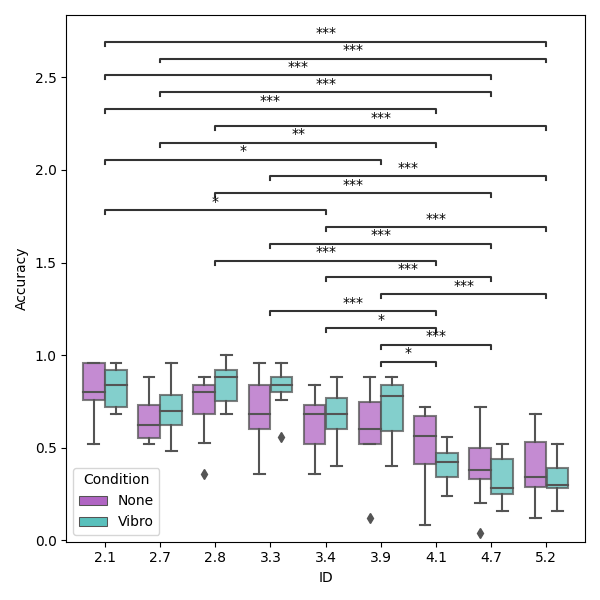

In [66]:

from statannotations.Annotator import Annotator

plt.figure(figsize=(6,6))
x = np.arange(0,9)

order = ["2.1","2.7", "2.8","3.3", "3.4","3.9","4.1", "4.7", "5.2"]
merged_df_str = merged_df
merged_df_str['ID'] = merged_df_str['ID'].astype(str)
molten_df['index'] = molten_df['index'].astype(str)
molten_df['variable'] = molten_df['variable'].astype(str)
molten_df = molten_df[molten_df.value <= 0.05]

my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.boxplot(x="ID", y="Performance", hue="Condition", data=merged_df_str, boxprops=dict(alpha=.75), palette=my_pal, order=order)  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# plt.title('Fit of performance based on ID')
# plt.xlabel('Index of difficulty (bits)')


pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]
p_values_str = [str(x) for x in p_values]


annotator = Annotator(
    ax, pairs, data=merged_df_str, x="ID", y="Performance", order=order
)
annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3.9 vs. 4.1: Custom statistical test, P_val:1.462e-02
3.9 vs. 4.7: Custom statistical test, P_val:1.000e-03
3.4 vs. 4.1: Custom statistical test, P_val:2.114e-02
3.3 vs. 4.1: Custom statistical test, P_val:1.000e-03
3.9 vs. 5.2: Custom statistical test, P_val:1.000e-03
3.4 vs. 4.7: Custom statistical test, P_val:1.000e-03
2.8 vs. 4.1: Custom statistical test, P_val:1.000e-03
3.3 vs. 4.7: Custom statistical test, P_val:1.000e-03
3.4 vs. 5.2: Custom statistical test, P_val:1.000e-03
2.1 vs. 3.4: Custom statistical test, P_val:3.523e-02
2.8 vs. 4.7: Custom statistical test, P_val:1.000e-03
3.3 vs. 5.2: Custom statistical test, P_val:1.000e-03
2.1 vs. 3.9: Custom statistical test, P_val:4.880e-02
2.7 vs. 4.1: Custom statistical test, P_val:2.852e-03
2.8 vs. 5.2: Custom statistical test, P_val:1.000e-03
2.1 vs. 4

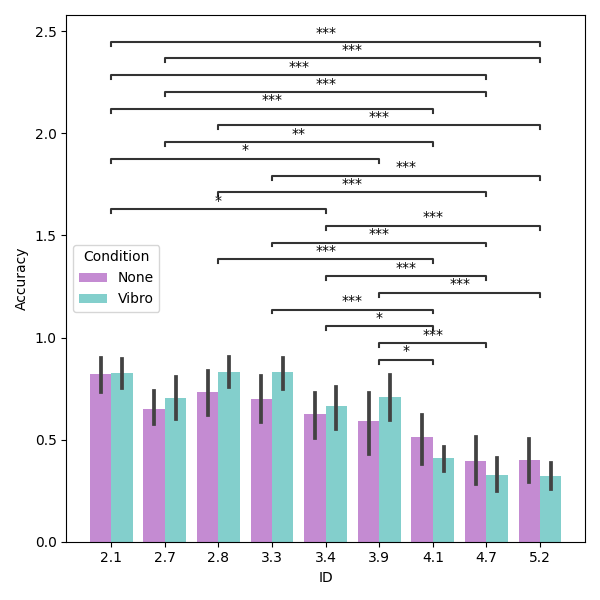

In [89]:
from statannotations.Annotator import Annotator

plt.figure(figsize=(6,6))
x = np.arange(0,9)

order = ["2.1","2.7", "2.8","3.3", "3.4","3.9","4.1", "4.7", "5.2"]
merged_df_str = merged_df
merged_df_str['ID'] = merged_df_str['ID'].astype(str)
molten_df['index'] = molten_df['index'].astype(str)
molten_df['variable'] = molten_df['variable'].astype(str)
molten_df = molten_df[molten_df.value <= 0.05]

my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.barplot(x="ID", y="Performance", hue="Condition", data=merged_df_str, alpha=.75, palette=my_pal, order=order)  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# plt.title('Fit of performance based on ID')
# plt.xlabel('Index of difficulty (bits)')


pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]
p_values_str = [str(x) for x in p_values]


annotator = Annotator(
    ax, pairs, data=merged_df_str, x="ID", y="Performance", order=order
)
annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('accuracy_ID_sig_bars_combined.png', dpi=500, bbox_inches="tight")
plt.show()

In [47]:
merged_df['ID'] = merged_df['ID'].astype(float)

In [48]:
# perform Tukey's test
tukey_cond = pairwise_tukeyhsd(endog=merged_df['Performance'],
                          groups=merged_df['Condition'],
                          alpha=0.05)

#display results
print(tukey_cond)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  None  Vibro   0.0158 0.6681 -0.0567 0.0882  False
---------------------------------------------------


In [49]:
# wo_df.groupby('ID').boxplot()
# merged_df.boxplot(by='ID')


In [50]:
np.unique(ID_wo)
ID_concat = np.concatenate((ID_wo, ID_haptics))
ID_rank = np.empty(np.shape(ID_concat))

for idx, unique in enumerate(np.unique(ID_concat)):
    indexes = np.argwhere(ID_concat == unique)
    ID_rank[indexes] = idx


In [51]:
np.unique(ID_wo)

array([2.12029423, 2.73696559, 2.79836614, 3.25779776, 3.4150375 ,
       3.87446912, 4.05889369, 4.73696559, 5.19639721])

In [52]:
np.unique(ID_wo)
avg_performance_wo = np.empty(np.shape(np.unique(ID_wo)))
avg_performance_haptics = np.empty(np.shape(np.unique(ID_haptics)))

for idx, unique in enumerate(np.unique(ID_wo)):
    indexes_wo = np.argwhere(ID_wo == unique)
    indexes_haptics = np.argwhere(ID_haptics == unique)

    avg_performance_wo[idx] = np.mean(performance_wo[indexes_wo])
    avg_performance_haptics[idx] = np.mean(performance_haptics[indexes_haptics])

In [53]:
avg_performance_wo
avg_performance_haptics

array([0.82666667, 0.70282609, 0.83      , 0.83111111, 0.665     ,
       0.71      , 0.40933333, 0.328     , 0.32      ])

In [54]:
print(ID_rank)

[8. 7. 6. 2. 3. 0. 5. 4. 1. 0. 2. 3. 6. 7. 8. 6. 8. 7. 1. 5. 4. 7. 8. 6.
 0. 3. 2. 4. 1. 5. 3. 0. 2. 6. 7. 8. 1. 5. 4. 2. 0. 3. 6. 8. 7. 4. 1. 5.
 0. 2. 3. 8. 7. 6. 3. 2. 0. 4. 5. 1. 6. 8. 7. 2. 0. 3. 6. 8. 7. 4. 1. 5.
 3. 2. 0. 8. 7. 6. 4. 1. 5. 8. 6. 7. 3. 2. 0. 1. 5. 4. 2. 3. 0. 8. 7. 6.
 6. 8. 7. 4. 5. 1. 6. 7. 8. 0. 3. 2. 4. 1. 5. 2. 0. 3. 7. 8. 6. 5. 1. 4.
 2. 3. 0. 6. 7. 8. 4. 1. 5. 2. 3. 0. 7. 8. 6. 0. 3. 2. 4. 1. 5. 6. 7. 8.
 3. 2. 0. 8. 6. 7. 5. 1. 4. 3. 2. 0. 6. 7. 8. 4. 5. 1.]


In [55]:
order = ID_wo.argsort()
print(order)
ranks = order.argsort()
print(ranks)

[40 31 56 24  9 64 74 48  5  8 46 59 79 70 36 28 18  3 49 73 39 10 32 55
 63 26 30 50 54 65 72 11  4 41 25 38 45 57 20 69  7 78 27 71 47 58 80 19
 37  6 29 42 15 77 53 33 23 66 12 60  2 68 17 21 62 76 34 52  1 44 13 75
 43 67 16 61 22 51 35 14  0]
[80 68 60 17 32  8 49 40  9  4 21 31 58 70 79 52 74 62 16 47 38 63 76 56
  3 34 25 42 15 50 26  1 22 55 66 78 14 48 35 20  0 33 51 72 69 36 10 44
  7 18 27 77 67 54 28 23  2 37 45 11 59 75 64 24  5 29 57 73 61 39 13 43
 30 19  6 71 65 53 41 12 46]


In [56]:
ID_rank_shift = np.concatenate((ID_rank[:81]-0.2, ID_rank[81:]+0.2))

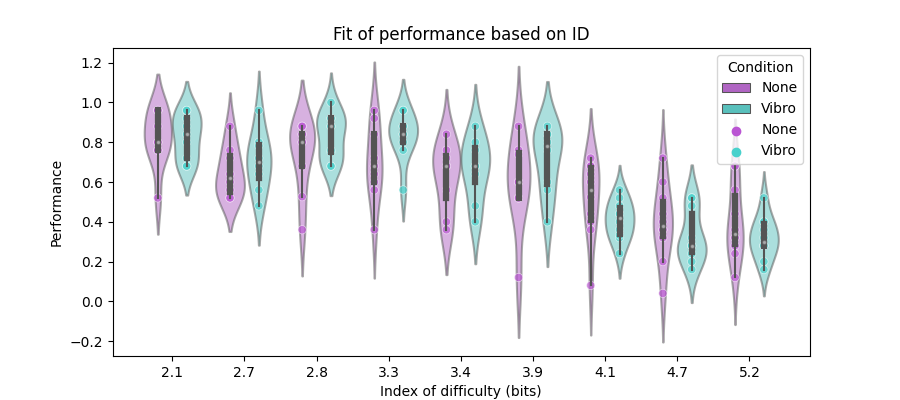

In [57]:
plt.figure(figsize=(9,4))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.ax = sns.violinplot(x="ID", y="Performance", hue="Condition", data=merged_df, alpha=0.5, palette=my_pal) 
plt.setp(ax.collections, alpha=.5)
sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')
from matplotlib.ticker import StrMethodFormatter

plt.show()

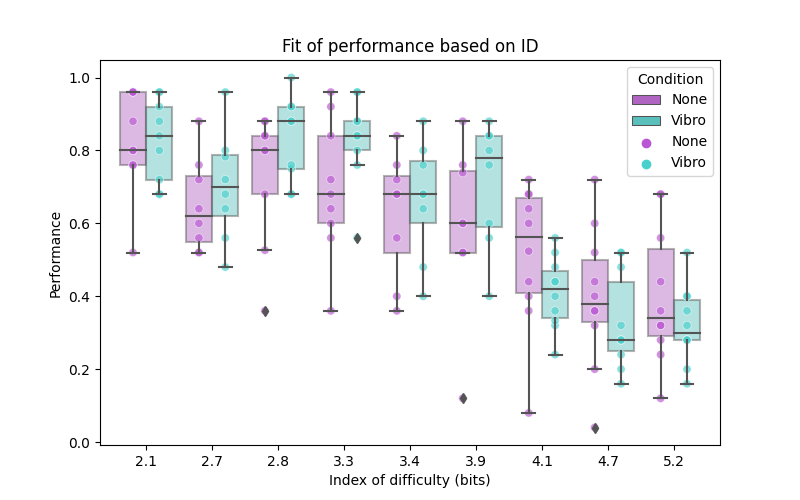

In [58]:
plt.figure(figsize=(8,5))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.boxplot(x="ID", y="Performance", hue="Condition", data=merged_df, boxprops=dict(alpha=.45), palette=my_pal)  
sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')

plt.show()

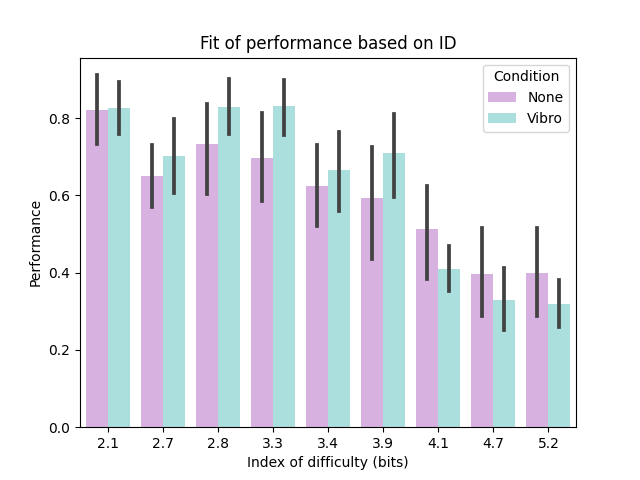

In [59]:
plt.figure()
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.barplot(x="ID", y="Performance", hue="Condition", data=merged_df, palette=my_pal, alpha=0.5)  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')

plt.show()

-0.8875003513127189
-0.9631471234944878


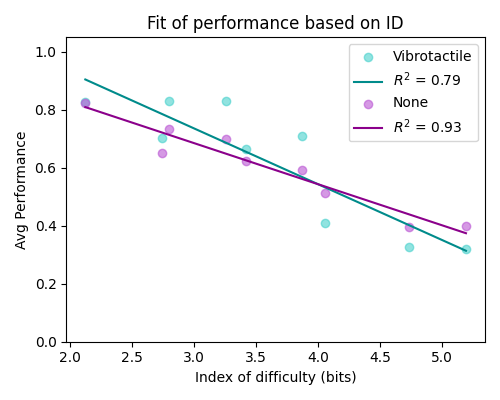

In [165]:
coef = np.polyfit(np.unique(ID_haptics),avg_performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(np.unique(ID_haptics),avg_performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(np.unique(ID_wo),avg_performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(np.unique(ID_wo),avg_performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(np.unique(ID_haptics), avg_performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(np.unique(ID_haptics), ID_fit_haptics(np.unique(ID_haptics)), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(np.unique(ID_wo), avg_performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(np.unique(ID_wo), ID_fit_wo(np.unique(ID_wo)), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Avg Accuracy')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('accuracy_ID_combined_avg.png', dpi=500, bbox_inches="tight")
plt.show()

0.8875003513127185
0.963147123494488


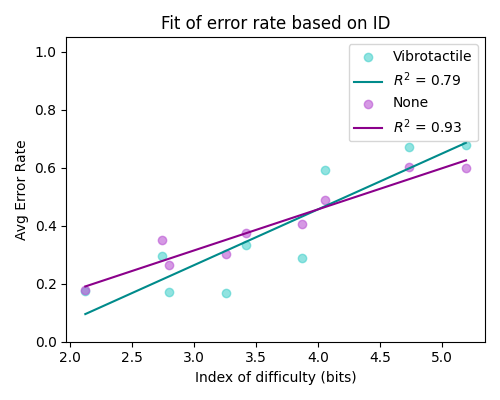

In [166]:
coef = np.polyfit(np.unique(ID_haptics),1-avg_performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(np.unique(ID_haptics),1-avg_performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(np.unique(ID_wo),1-avg_performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(np.unique(ID_wo),1-avg_performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(np.unique(ID_haptics), 1-avg_performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(np.unique(ID_haptics), ID_fit_haptics(np.unique(ID_haptics)), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(np.unique(ID_wo), 1-avg_performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(np.unique(ID_wo), ID_fit_wo(np.unique(ID_wo)), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of error rate based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Avg Error Rate')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_ID_combined_avg.png', dpi=500, bbox_inches="tight")
plt.show()

-0.7730925032523995
-0.6170290740347153


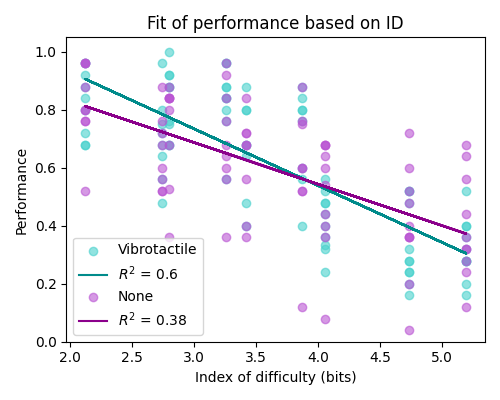

In [169]:
coef = np.polyfit(ID_haptics,performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(ID_haptics,performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(ID_wo,performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(ID_wo,performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(ID_haptics, performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(ID_haptics, ID_fit_haptics(ID_haptics), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(ID_wo, performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(ID_wo, ID_fit_wo(ID_wo), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Accuracy')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('accuracy_ID_combined.png', dpi=500, bbox_inches="tight")
plt.show()

C:\Users\Nikole Chetty\AppData\Local\Temp\ipykernel_21312\2244394076.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,4))


(array([ 4.,  1.,  2., 13.,  3., 12., 17., 11.,  8., 10.]),
 array([0.04 , 0.132, 0.224, 0.316, 0.408, 0.5  , 0.592, 0.684, 0.776,
        0.868, 0.96 ]),
 <BarContainer object of 10 artists>)

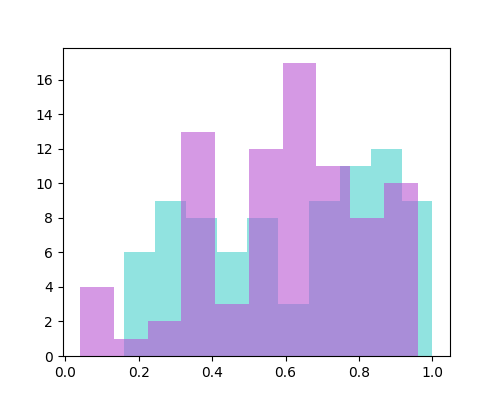

In [71]:
plt.figure(figsize=(5,4))
plt.hist(performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
plt.hist(performance_wo, alpha=0.6, label='None', color='mediumorchid')

In [74]:
performance_haptics

array([0.36      , 0.24      , 0.16      , 0.56      , 0.68      ,
       0.68      , 0.56      , 0.56      , 0.4       , 0.92      ,
       0.84      , 0.68      , 0.4       , 0.32      , 0.32      ,
       0.52      , 0.52      , 0.24      , 0.68      , 0.84      ,
       0.68      , 0.48      , 0.2       , 0.28      , 0.92      ,
       0.76      , 0.75      , 0.48      , 0.48      , 0.4       ,
       0.92      , 0.96      , 0.96      , 0.52      , 0.28      ,
       0.36      , 0.88      , 0.8       , 0.64      , 0.68      ,
       0.88      , 0.96      , 0.56      , 0.28      , 0.16      ,
       0.8       , 0.72      , 0.6       , 0.88      , 0.96      ,
       0.88      , 0.28      , 0.2       , 0.33333333, 0.84      ,
       0.8       , 1.        , 0.88      , 0.96      , 0.8       ,
       0.4       , 0.52      , 0.4       , 0.84      , 0.76      ,
       0.72      , 0.28      , 0.44      , 0.48      , 0.76      ,
       0.64      , 0.68      , 0.88      , 0.88      , 0.8    

Mean diff: 0.004444444444444473 stdev: 0.10666666666666665 stdev: 0.13348139926827737
Mean diff: 0.05282608695652191 stdev: 0.13998227676096486 stdev: 0.11958260743101397
Mean diff: 0.0959649122807017 stdev: 0.10873004286866726 stdev: 0.16988254773408293
Mean diff: 0.1333333333333333 stdev: 0.11435271404683203 stdev: 0.17799986128445142
Mean diff: 0.040000000000000036 stdev: 0.1495827530165159 stdev: 0.15992185591719477
Mean diff: 0.11760869565217391 stdev: 0.1596871942267131 stdev: 0.21392000253791674
Mean diff: -0.103047619047619 stdev: 0.09315220519844569 stdev: 0.18746573383033022
Mean diff: -0.068 stdev: 0.12496399481450647 stdev: 0.18369540005128054
Mean diff: -0.08000000000000013 stdev: 0.09959919678390987 stdev: 0.17798876369029593


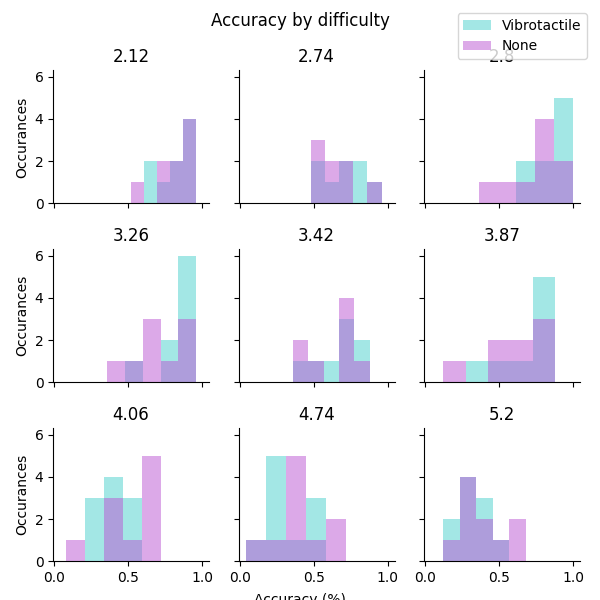

In [86]:


fig, ax = plt.subplots(3, 3, figsize=(6, 6), sharex=True, sharey=True)
ax = ax.flatten()
ID_ordered = np.sort(np.unique(ID_haptics))
for idx, the_ID in enumerate(ID_ordered):

    # print(the_ID)
    idx_haptics = np.argwhere(the_ID == ID_haptics)

    idx_wo = np.argwhere(the_ID == ID_wo)
    
    hist_haptics = performance_haptics[idx_haptics].squeeze()
    # print('ID:', the_ID, 'stats:', stats.shapiro(hist_haptics))
    # print("Vibro: ID:", the_ID, 'mean:', np.mean(hist_haptics), 'stdev:', np.std(hist_haptics))
    
    # print(hist_haptics)

    hist_wo = performance_wo[idx_wo].squeeze()
    # print('ID:', the_ID, 'stats:', stats.shapiro(hist_wo))
    # print("None: ID:", the_ID, 'mean:', np.mean(hist_wo), 'stdev:', np.std(hist_wo))
    print('Mean diff:',np.mean(hist_haptics)- np.mean(hist_wo), 'stdev:', np.std(hist_haptics),  'stdev:', np.std(hist_wo))
    # print(hist_wo)

    bins = np.histogram(np.hstack((hist_haptics, hist_wo)), bins=5)[1]


    
    ax[idx].hist(hist_haptics, bins=bins, alpha=0.5, label='Vibrotactile', color='mediumturquoise')
    ax[idx].hist(hist_wo, bins=bins, alpha=0.5, label='None', color='mediumorchid')

    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].set_title(round(the_ID, 2))
    if idx % 3 == 0:  
        ax[idx].set_ylabel('Occurances')

handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Accuracy by difficulty')
fig.text(0.5, 0.0, 'Accuracy (%)', ha='center', va='center')
plt.tight_layout()

plt.savefig('accuracy_by_ID_combined.png', dpi=500, bbox_inches="tight")
plt.show()
    

0.7730925032523994
0.6170290740347156


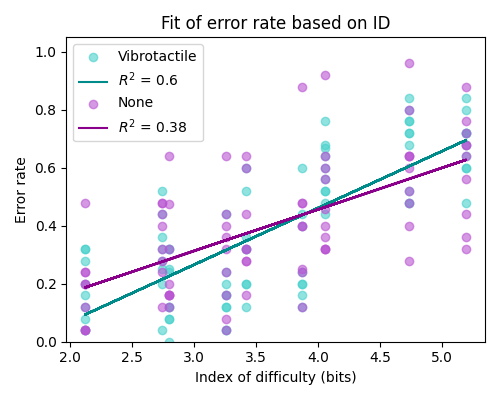

In [168]:
coef = np.polyfit(ID_haptics,1-performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(ID_haptics,1-performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(ID_wo,1-performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(ID_wo,1-performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(ID_haptics, 1-performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(ID_haptics, ID_fit_haptics(ID_haptics), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(ID_wo, 1-performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(ID_wo, ID_fit_wo(ID_wo), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of error rate based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Error rate')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_ID_combined.png', dpi=500, bbox_inches="tight")
plt.show()

In [112]:
np.shape(np.expand_dims(performance_wo, axis=0).T)

(81, 1)

In [113]:
np.shape(combos_wo)

(81, 2)

In [115]:
np.hstack((combos_wo, np.expand_dims(performance_wo, axis=0).T))

array([[6.00000000e+01, 2.20000000e+03, 1.20000000e-01],
       [6.00000000e+01, 1.60000000e+03, 4.00000000e-02],
       [6.00000000e+01, 1.00000000e+03, 8.00000000e-02],
       [2.30000000e+02, 1.60000000e+03, 3.60000000e-01],
       [2.30000000e+02, 2.20000000e+03, 3.60000000e-01],
       [2.30000000e+02, 1.00000000e+03, 5.20000000e-01],
       [1.50000000e+02, 2.20000000e+03, 1.20000000e-01],
       [1.50000000e+02, 1.60000000e+03, 3.60000000e-01],
       [1.50000000e+02, 1.00000000e+03, 5.20000000e-01],
       [2.30000000e+02, 1.00000000e+03, 7.60000000e-01],
       [2.30000000e+02, 1.60000000e+03, 8.40000000e-01],
       [2.30000000e+02, 2.20000000e+03, 5.60000000e-01],
       [6.00000000e+01, 1.00000000e+03, 6.40000000e-01],
       [6.00000000e+01, 1.60000000e+03, 3.60000000e-01],
       [6.00000000e+01, 2.20000000e+03, 2.40000000e-01],
       [6.00000000e+01, 1.00000000e+03, 4.00000000e-01],
       [6.00000000e+01, 2.20000000e+03, 3.60000000e-01],
       [6.00000000e+01, 1.60000

In [116]:
combos_wo_df = pd.DataFrame(np.hstack((combos_wo, np.expand_dims(performance_wo, axis=0).T)), columns=['Width', 'Distance', 'Performance'])
combos_wo_df['Condition'] = 'None'

combos_haptics_df = pd.DataFrame(np.hstack((combos_haptics, np.expand_dims(performance_haptics, axis=0).T)), columns=['Width', 'Distance', 'Performance'])
combos_haptics_df['Condition'] = 'Vibro'

combos_merged_df = pd.concat([combos_wo_df,combos_haptics_df], ignore_index=True)
print(combos_merged_df)

     Width  Distance  Performance Condition
0     60.0    2200.0         0.12      None
1     60.0    1600.0         0.04      None
2     60.0    1000.0         0.08      None
3    230.0    1600.0         0.36      None
4    230.0    2200.0         0.36      None
..     ...       ...          ...       ...
157   60.0    1600.0         0.24     Vibro
158   60.0    2200.0         0.32     Vibro
159  150.0    1600.0         0.80     Vibro
160  150.0    2200.0         0.80     Vibro
161  150.0    1000.0         0.75     Vibro

[162 rows x 4 columns]


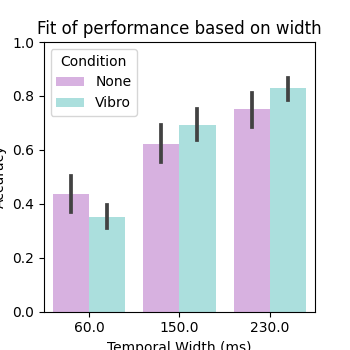

In [122]:
plt.figure(figsize=(3.5,3.5))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.barplot(x="Width", y="Performance", hue="Condition", data=combos_merged_df, palette=my_pal, alpha=0.5)  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Fit of performance based on width')
plt.xlabel('Temporal Width (ms)')
plt.ylabel('Accuracy')
plt.ylim([0,1])

plt.show()

In [176]:
combos_merged_df

,Width,Distance,Performance,Condition
0,60.0,2200.0,0.12,None
1,60.0,1600.0,0.04,None
2,60.0,1000.0,0.08,None
3,230.0,1600.0,0.36,None
4,230.0,2200.0,0.36,None
...,...,...,...,...
157,60.0,1600.0,0.24,Vibro
158,60.0,2200.0,0.32,Vibro
159,150.0,1600.0,0.80,Vibro
160,150.0,2200.0,0.80,Vibro


In [181]:
combos_wo[:,0]

array([ 60.,  60.,  60., 230., 230., 230., 150., 150., 150., 230., 230.,
       230.,  60.,  60.,  60.,  60.,  60.,  60., 150., 150., 150.,  60.,
        60.,  60., 230., 230., 230., 150., 150., 150., 230., 230., 230.,
        60.,  60.,  60., 150., 150., 150., 230., 230., 230.,  60.,  60.,
        60., 150., 150., 150., 230., 230., 230.,  60.,  60.,  60., 230.,
       230., 230., 150., 150., 150.,  60.,  60.,  60., 230., 230., 230.,
        60.,  60.,  60., 150., 150., 150., 230., 230., 230.,  60.,  60.,
        60., 150., 150., 150.])

-0.8386937226460567
-0.6020046957769489


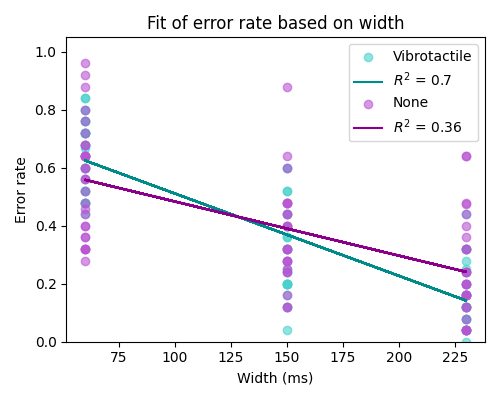

In [183]:
# plt.figure(figsize=(3.5,3))
# x = np.arange(0,9)
# my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
# ax = sns.lmplot(x="Width", y="Performance", hue="Condition", data=combos_merged_df)  
# # sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# # ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# plt.title('Fit of performance based on width')
# plt.xlabel('Temporal Width (ms)')
# plt.ylabel('Accuracy')
# plt.ylim([0,1.01])
# plt.tight_layout()
# plt.show()

coef = np.polyfit(combos_haptics[:,0],1-performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(combos_haptics[:,0],1-performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(combos_wo[:,0],1-performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(combos_wo[:,0],1-performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(combos_haptics[:,0], 1-performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(combos_haptics[:,0], ID_fit_haptics(combos_haptics[:,0]), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(combos_wo[:,0], 1-performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(combos_wo[:,0], ID_fit_wo(combos_wo[:,0]), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of error rate based on width')
plt.xlabel('Width (ms)')
plt.ylabel('Error rate')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_width_combined.png', dpi=500, bbox_inches="tight")
plt.show()

0.05281902847020234
0.18535260683545995


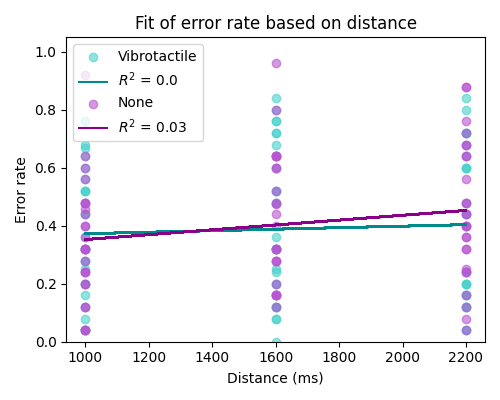

In [185]:
# plt.figure(figsize=(3.5,3))
# x = np.arange(0,9)
# my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
# ax = sns.lmplot(x="Width", y="Performance", hue="Condition", data=combos_merged_df)  
# # sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# # ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# plt.title('Fit of performance based on width')
# plt.xlabel('Temporal Width (ms)')
# plt.ylabel('Accuracy')
# plt.ylim([0,1.01])
# plt.tight_layout()
# plt.show()

coef = np.polyfit(combos_haptics[:,1],1-performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(combos_haptics[:,1],1-performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(combos_wo[:,1],1-performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(combos_wo[:,1],1-performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(combos_haptics[:,1], 1-performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(combos_haptics[:,1], ID_fit_haptics(combos_haptics[:,1]), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(combos_wo[:,1], 1-performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(combos_wo[:,1], ID_fit_wo(combos_wo[:,1]), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of error rate based on distance')
plt.xlabel('Distance (ms)')
plt.ylabel('Error rate')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_distance_combined.png', dpi=500, bbox_inches="tight")
plt.show()

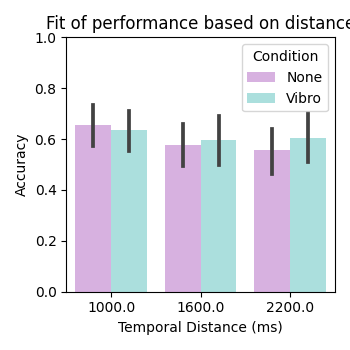

In [121]:


merged_df_str = merged_df
merged_df_str['ID'] = merged_df_str['ID'].astype(str)
molten_df['index'] = molten_df['index'].astype(str)
molten_df['variable'] = molten_df['variable'].astype(str)
molten_df = molten_df[molten_df.value <= 0.05]

my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.barplot(x="ID", y="Performance", hue="Condition", data=merged_df_str, alpha=.75, palette=my_pal, order=order)  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# plt.title('Fit of performance based on ID')
# plt.xlabel('Index of difficulty (bits)')


pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]
p_values_str = [str(x) for x in p_values]


plt.figure(figsize=(3.5,3.5))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.barplot(x="Distance", y="Performance", hue="Condition", data=combos_merged_df, palette=my_pal, alpha=0.5)  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Fit of performance based on distance')
plt.xlabel('Temporal Distance (ms)')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.tight_layout()
plt.show()

In [123]:
#perform two-way ANOVA
model = ols('Performance ~ C(Width) + C(Distance) + C(Condition) + C(Condition):C(Width) + C(Condition):C(Distance)+ C(Width):C(Distance) + C(Width):C(Distance):C(Condition)', data=combos_merged_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Width),4.655726,2.0,93.936338,7.801026e-27
C(Distance),0.143018,2.0,2.885604,5.905537e-02
C(Condition),0.008527,1.0,0.344109,5.583854e-01
C(Condition):C(Width),0.232914,2.0,4.699384,1.054204e-02
C(Condition):C(Distance),0.032465,2.0,0.655023,5.209708e-01
C(Width):C(Distance),0.034481,4.0,0.347851,8.451848e-01
C(Width):C(Distance):C(Condition),0.017306,4.0,0.174592,9.511438e-01
Residual,3.568505,144.0,NaN,NaN


In [147]:
# perform Tukey's test
tukey_width = pairwise_tukeyhsd(endog=combos_merged_df['Performance'],
                          groups=combos_merged_df['Width'],
                          alpha=0.05)

#display results
print(tukey_width)


tukey_width_df = posthoc_tukey(combos_merged_df, val_col="Performance", group_col="Width")
tukey_width_df

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 150.0  230.0    0.134 0.0001  0.0592  0.2087   True
 150.0   60.0  -0.2625    0.0 -0.3355 -0.1895   True
 230.0   60.0  -0.3965   -0.0 -0.4672 -0.3257   True
----------------------------------------------------


,60.0,230.0,150.0
60.0,1.000,0.001,0.001
230.0,0.001,1.000,0.001
150.0,0.001,0.001,1.000


In [152]:
tukey_distance = pairwise_tukeyhsd(endog=combos_merged_df['Performance'],
                          groups=combos_merged_df['Distance'],
                          alpha=0.05)

#display results
print(tukey_distance)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
1000.0 1600.0  -0.0598 0.3753 -0.1654 0.0458  False
1000.0 2200.0  -0.0658 0.3056 -0.1714 0.0397  False
1600.0 2200.0   -0.006 0.9899 -0.1116 0.0995  False
---------------------------------------------------


In [142]:
combos_merged_df_str.Width

0       60.0
1       60.0
2       60.0
3      230.0
4      230.0
       ...  
157     60.0
158     60.0
159    150.0
160    150.0
161    150.0
Name: Width, Length: 162, dtype: object

[('60.0', '230.0'), ('60.0', '150.0'), ('230.0', '150.0')]
['0.001', '0.001', '0.001']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

60.0 vs. 150.0: Custom statistical test, P_val:1.000e-03
150.0 vs. 230.0: Custom statistical test, P_val:1.000e-03
60.0 vs. 230.0: Custom statistical test, P_val:1.000e-03


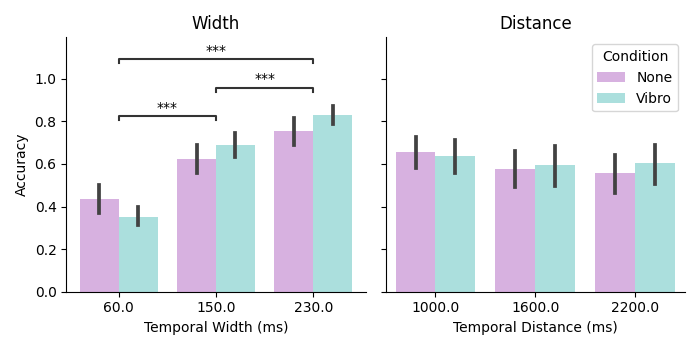

In [164]:
remove = np.tril(np.ones(tukey_width_df.shape), k=0).astype("bool")
tukey_width_df[remove] = np.nan

molten_width = tukey_width_df.melt(ignore_index=False).reset_index().dropna()
molten_width 


combos_merged_df_str = combos_merged_df
# combos_merged_df_str.Width = combos_merged_df_str.Width.round(1)
combos_merged_df_str['Width'] = combos_merged_df_str['Width'].astype(str)
molten_width ['index'] = molten_width['index'].astype(str)
molten_width ['variable'] = molten_width ['variable'].astype(str)
molten_width  = molten_width [molten_width .value <= 0.05]

pairs_width = [(i[1]["index"], i[1]["variable"]) for i in molten_width.iterrows()]
print(pairs_width)
p_values_width = [i[1]["value"] for i in molten_width.iterrows()]
p_values_width_str = [str(x) for x in p_values_width]

print(p_values_width_str)




fig, axes = plt.subplots(1, 2, figsize=(7,3.5), sharey=True)

my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.barplot(ax=axes[0], x="Width", y="Performance", hue="Condition", data=combos_merged_df_str, palette=my_pal, alpha=0.5, order=["60.0", "150.0", "230.0"])  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[0].set_title('Width')
axes[0].set_xlabel('Temporal Width (ms)')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0,1])
axes[0].legend([],[], frameon=False)

annotator = Annotator(
    axes[0], pairs_width, data=combos_merged_df_str, x="Width", y="Performance", order=["60.0", "150.0", "230.0"]
)
annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values_width)


ax = sns.barplot(ax=axes[1], x="Distance", y="Performance", hue="Condition", data=combos_merged_df, palette=my_pal, alpha=0.5)  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[1].set_title('Distance')
axes[1].set_ylabel('')
axes[1].set_xlabel('Temporal Distance (ms)')



axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)




plt.tight_layout()
plt.savefig('accuracy_width_distance_combined_sig.png', dpi=500, bbox_inches="tight")
plt.show()

In [69]:

dt_coef_haptics = np.polyfit(gui_combos_haptics[:,1],1-performance_haptics,1)
print(dt_coef_haptics)
dt_fn_haptics = np.poly1d(dt_coef_haptics) 
r_value_haptics = stats.linregress(gui_combos_haptics[:,1],1-performance_haptics)[2]
print(r_value_haptics)


dt_coef_wo = np.polyfit(gui_combos_wo[:,1],1-performance_wo,1)
print(dt_coef_wo)
dt_fn_wo = np.poly1d(dt_coef_wo) 
r_value_wo = stats.linregress(gui_combos_wo[:,1],1-performance_wo)[2]
print(r_value_wo) 

plt.figure(figsize=(5,4))
plt.scatter(gui_combos_haptics[:,1], 1-performance_haptics[0:np.shape(ID_haptics)[0]], alpha=0.5, label="Vibrotactile", color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(gui_combos_haptics[:, 1][0:3], dt_fn_haptics(gui_combos_haptics[:, 1][0:3]), color='darkcyan', label=label_str_haptics)


plt.scatter(gui_combos_wo[:,1], 1-performance_wo[0:np.shape(ID_wo)[0]], alpha=0.5,  label="None", color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(gui_combos_wo[:, 1][0:3], dt_fn_wo(gui_combos_wo[:, 1][0:3]),color='darkmagenta', label=label_string_wo)


plt.title('Fit of error rate based on target distance')
plt.xlabel('$D_{t}$ - Temporal Distance (ms)')
plt.ylabel('Error rate')
plt.ylim([0, 1.05])
plt.legend()
plt.tight_layout()
plt.savefig('errorrate_distance.png', dpi=500, bbox_inches="tight")
plt.show()

NameError: name 'gui_combos_haptics' is not defined

In [ ]:
widths = gui_combos_haptics[:,0]//60
# print(widths)
width_levels = np.repeat(widths, repitions)
# print(width_levels)

# box_plot_data_width = np.split(threshold_distance_timestamp, np.unique(width_levels, return_index=True)[1][1:])
# # print(box_plot_data_width)

width_split = [threshold_distance_timestamp_haptics[width_levels == i] for i in range(width_levels.max() + 1)]
width_split = width_split[1:]
# print(width_split)
# print(np.shape(width_split))

# width_split = width_split[~np.isnan(width_split)]
width_no_nan  = [list[~np.isnan(list)] for list in width_split]
print(width_no_nan)


In [ ]:

fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.set_title('')
ax1.boxplot(width_no_nan, positions=np.unique(gui_combos_haptics[:,0]), widths=3)
plt.title('Reaction time per width')
plt.ylabel('Time (in seconds)')
plt.xlabel('$W_{t}$ - Target Width (ms)')
plt.xlim([50, 240])
plt.tight_layout()
from matplotlib.ticker import FormatStrFormatter
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

In [ ]:
box_plot_data_haptics = np.split(threshold_distance_timestamp_haptics, np.unique(level, return_index=True)[1][1:])
bar_mean_haptics = np.nanmean(box_plot_data_haptics, axis=1)
print('Vibro mean:', bar_mean_haptics)
bar_std_haptics = np.nanstd(box_plot_data_haptics, axis=1)
print('Vibro std:', bar_std_haptics)

box_plot_data_wo = np.split(threshold_distance_timestamp_wo, np.unique(level, return_index=True)[1][1:])
bar_mean_wo = np.nanmean(box_plot_data_wo, axis=1)
print('None mean:', bar_mean_wo)
bar_std_wo = np.nanstd(box_plot_data_wo, axis=1)
print('None std:', bar_std_wo)

plt.figure(figsize=(8,3))
ax = plt.subplot(111)
w = 0.05
x= np.arange(np.shape(bar_mean_wo)[0])
ax.bar(ID_wo-w/2, bar_mean_wo, yerr=bar_std_wo, width=w, color='mediumorchid', align='center', label='None')
ax.bar(ID_haptics+w/2, bar_mean_haptics,yerr=bar_std_haptics, width=w, color='mediumturquoise', align='center', label='Vibrotactile')
plt.legend()
plt.title('Reaction time per ID')
plt.ylabel('Time (in seconds)')
plt.xlabel('Index of Difficulty (bits)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('reactiontime_ID.png', dpi=500, bbox_inches="tight")
plt.show()

In [ ]:
box_plot_data_haptics = np.split(threshold_distance_timestamp_haptics, np.unique(level, return_index=True)[1][1:])
# print(box_plot_data)
box_plot_data_no_nan_haptics  = [list[~np.isnan(list)] for list in box_plot_data_haptics]

box_plot_data_wo = np.split(threshold_distance_timestamp_wo, np.unique(level, return_index=True)[1][1:])
# print(box_plot_data)
box_plot_data_no_nan_wo  = [list[~np.isnan(list)] for list in box_plot_data_wo]

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(box_plot_data_no_nan_wo, positions=ID_wo.round(3), widths=0.05)
plt.title('Reaction time per ID')
plt.ylabel('Time (in seconds)')
plt.xlabel('Index of Difficulty (bits)')
from matplotlib.ticker import FormatStrFormatter
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))



In [ ]:
# # Exclude the first pulse - that is ardunio power cycling
# start_cue = start_cue[1:] # [1:]
# stop_cue = stop_cue[1:] #[1:]

# threshold_closest = np.empty(np.size(start_cue[:]))
# threshold_closest[:] = np.nan
# correct = np.empty(np.size(start_cue[:]))
# ###for every value in the strt_cue 
# for idx_cue, cue in enumerate(start_cue[:]):

#     after_start = start_cue[idx_cue] <= threshold_crossings_up
#     before_stop = threshold_crossings_up <= stop_cue[idx_cue]
#     # check if there is a value between start_cue and stop cue
#     if np.any(np.logical_and(after_start, before_stop)):
#         in_target = np.argwhere(np.logical_and(after_start, before_stop))
#         closet_value = in_target[0]
#         threshold_closest[idx_cue] = threshold_crossings_up[in_target[0]]
#         correct[idx_cue] = True
#     else:
#         # if not - get closet 
#         idx = (np.abs(threshold_crossings_up - start_cue[idx_cue])).argmin()

#         threshold_closest[idx_cue] = threshold_crossings_up[idx]
#         correct[idx_cue] = False
#          # get rid of values greater than half the distance between the next cue 

# print("closest:", threshold_closest)
# print("correctness:", correct)

# threshold_distance = threshold_closest - start_cue
# print("distance away:", threshold_distance)


# threshold_distance[threshold_distance > 4000] = NaN
# threshold_distance[threshold_distance < -4000] = NaN
# print("distance away:", threshold_distance)

In [ ]:
# plt.figure()
# plt.hist(threshold_distance/4000, bins=15)
# plt.title('Time of "click" from cue onset (all levels)')
# plt.xlabel('Time (in seconds)')
# plt.ylabel('Occurances')
# plt.show()

In [ ]:
# rt = threshold_distance/4000
# print(rt)
# rt = rt[~np.isnan(rt)]
# print(rt)

In [ ]:
# rt_normalized = (rt - np.mean(rt))/np.std(rt)
# stats.kstest(rt_normalized, stats.norm.cdf)
# # if p val is greater than 0.05 -> GAUSSIAN

In [ ]:


# np.random.seed(0)

# mu = np.mean(rt)
# sigma = np.std(rt)
# n_bins = 50

# fig, ax = plt.subplots(figsize=(8, 4))

# # plot the cumulative histogram
# n, bins, patches = ax.hist(rt, n_bins, density=1, histtype='step',
#                            cumulative=True, label='Empirical')

# # Add a line showing the expected distribution.
# y = stats.norm.pdf(bins, mu, sigma).cumsum()
# y /= y[-1]

# ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')



# # tidy up the figure
# ax.grid(True)
# ax.legend(loc='right')
# ax.set_title('Cumulative step histograms')
# ax.set_xlabel('Reaction time (sec)')
# ax.set_ylabel('Likelihood of occurrence')

# plt.show()

In [ ]:
# repitions = gui_data['reps'] 
# print("repitions:", repitions)
# level = np.arange(len(correct))//repitions
# print('Levels:', level)
# performance = np.bincount(level,correct)/np.bincount(level)
# print('performance per level:', performance)


In [ ]:


# box_plot_data = np.split(threshold_distance/4000, np.unique(level, return_index=True)[1][1:])
# print(box_plot_data)

In [ ]:
# for idx, data in enumerate(box_plot_data):
#     box_plot_data[idx] = data[~np.isnan(data)]



In [ ]:
# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(box_plot_data[0:np.shape(ID)[0]], positions=ID.round(3), widths=0.05)
# plt.title('Reaction time per ID')
# plt.ylabel('Time (in seconds)')
# plt.xlabel('Index of Difficulty (bits)')
# from matplotlib.ticker import FormatStrFormatter
# ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

In [ ]:
# plt.figure(figsize=(5,3))
# plt.scatter(ID, 1-performance[0:np.shape(ID)[0]])
# plt.title('Fit of error rate based on ID')
# plt.xlabel('Index of difficulty (bits)')
# plt.ylabel('Error rate')
# plt.show()
# # plt.xlim([0, 4])
# plt.ylim([0, 1.05])
# plt.tight_layout()

In [ ]:
# plt.figure(figsize=(5,3))
# plt.scatter(gui_data['combos'][:,0], 1-performance[0:np.shape(ID)[0]])
# plt.title('Fit of error rate based on target width')
# plt.xlabel('$W_{t}$ - Target Width (ms)')
# plt.ylabel('Error rate')
# plt.ylim([0, 1.05])
# plt.tight_layout()
# plt.show()


In [ ]:
# plt.figure(figsize=(5,3))
# plt.scatter(gui_data['combos'][:,1], 1-performance[0:np.shape(ID)[0]])
# plt.title('Fit of error rate based on target distance')
# plt.xlabel('$D_{t}$ - Temporal Distance (ms)')
# plt.ylabel('Error rate')
# plt.ylim([0, 1.05])
# plt.tight_layout()
# plt.show()